# EDA and Baseline for Used Car Price Prediction
**File:** `Third_Step-Cleaned_features.csv`

Target: `price` (regression)

This notebook performs: data loading, cleaning, exploratory data analysis, feature engineering, and a simple regression baseline. Uses only pandas, numpy, matplotlib and seaborn as requested.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style='whitegrid')

In [4]:
# Load dataset
path = 'Third_Step-Cleaned_features.csv'
print('Loading:', path)
df = pd.read_csv(path)
df.head()

Loading: Third_Step-Cleaned_features.csv


,brand,model_year,mileage,fuel_type,transmission,exterior_color,interior_color,accident,clean_title,price,engine_size_L,car_age,miles_per_year
0,Ford,2013,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7,12,4250.000000
1,Hyundai,2021,34742,Gasoline,Automatic,White,Gray,At least 1 accident or damage reported,Yes,38005,3.8,4,8685.500000
2,Lexus,2022,22372,Gasoline,Automatic,Blue,Black,None reported,No,54598,3.5,3,7457.333333
3,INFINITI,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,15500,3.5,10,8890.000000
4,Audi,2021,9835,Gasoline,Automatic,White,Black,None reported,No,34999,2.0,4,2458.750000


In [5]:
# Basic info and initial checks
print('Shape:', df.shape)
print('\nColumns:')
print(df.columns.tolist())
print('\nDtypes:')
print(df.dtypes)
print('\nMissing values per column:')
print(df.isnull().sum())

# Quick describe for numeric columns
print('\nNumeric summary:')
print(df.select_dtypes(include=[np.number]).describe().T)

Shape: (4009, 13)

Columns:
['brand', 'model_year', 'mileage', 'fuel_type', 'transmission', 'exterior_color', 'interior_color', 'accident', 'clean_title', 'price', 'engine_size_L', 'car_age', 'miles_per_year']

Dtypes:
brand              object
model_year          int64
mileage             int64
fuel_type          object
transmission       object
exterior_color     object
interior_color     object
accident           object
clean_title        object
price               int64
engine_size_L      object
car_age             int64
miles_per_year    float64
dtype: object

Missing values per column:
brand             0
model_year        0
mileage           0
fuel_type         0
transmission      0
exterior_color    0
interior_color    0
accident          0
clean_title       0
price             0
engine_size_L     0
car_age           0
miles_per_year    0
dtype: int64

Numeric summary:
                 count          mean           std          min      25%  \
model_year      4009.0   2015.5155

## Target column
Target column is `price`. Confirming distribution and basic stats.

Price summary:
count    4.009000e+03
mean     4.455319e+04
std      7.871064e+04
min      2.000000e+03
25%      1.720000e+04
50%      3.100000e+04
75%      4.999000e+04
max      2.954083e+06
Name: price, dtype: float64


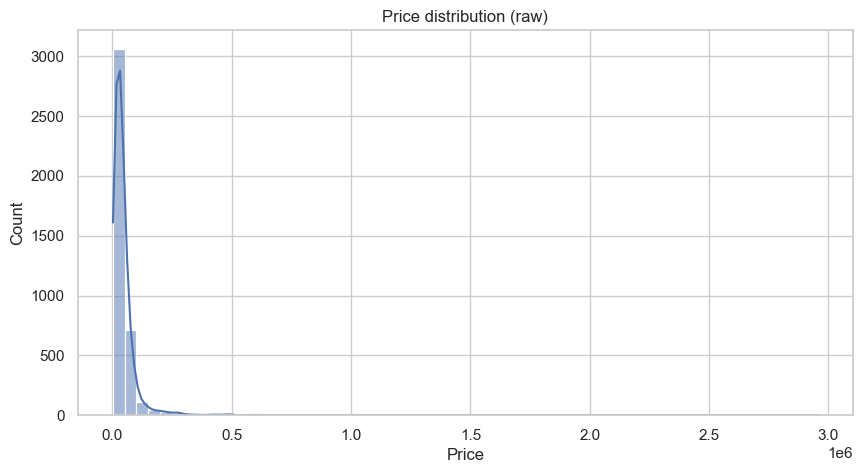

In [6]:
print('Price summary:')
print(df['price'].describe())

# Quick histogram
plt.figure()
sns.histplot(df['price'], bins=60, kde=True)
plt.title('Price distribution (raw)')
plt.xlabel('Price')
plt.show()

In [7]:
# Check for 'Unknown' strings and object columns that should be numeric
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Object cols:', obj_cols)
for c in obj_cols:
    n_unknown = (df[c]=='Unknown').sum()
    if n_unknown>0:
        print(f"{c}: 'Unknown' count = {n_unknown}")

# Inspect engine_size_L if present
if 'engine_size_L' in df.columns:
    print('\nengine_size_L unique sample:', df['engine_size_L'].unique()[:15])

Object cols: ['brand', 'fuel_type', 'transmission', 'exterior_color', 'interior_color', 'accident', 'clean_title', 'engine_size_L']
transmission: 'Unknown' count = 426
exterior_color: 'Unknown' count = 15
accident: 'Unknown' count = 113
engine_size_L: 'Unknown' count = 217

engine_size_L unique sample: ['3.7' '3.8' '3.5' '2.0' '2.4' '4.4' 'Unknown' '5.2' '3.0' '5.0' '3.6'
 '2.2' '5.3' '1.8' '5.7']


## Cleaning
- Convert `engine_size_L` to numeric if it exists (drop or impute 'Unknown').
- Remove rows with 'Unknown' in critical fields (engine_size_L, transmission, accident) for simplicity.
- Show rows before/after cleaning and basic checks.

In [8]:
df_clean = df.copy()
# Convert engine_size_L to numeric where possible
if 'engine_size_L' in df_clean.columns:
    # Replace common nuisance strings
    df_clean['engine_size_L'] = df_clean['engine_size_L'].replace('Unknown', np.nan)
    df_clean['engine_size_L'] = pd.to_numeric(df_clean['engine_size_L'], errors='coerce')

# Columns to treat as critical if present
critical_cols = []
for c in ['engine_size_L','transmission','accident']:
    if c in df_clean.columns:
        critical_cols.append(c)

print('Critical columns detected:', critical_cols)
rows_before = df_clean.shape[0]
if critical_cols:
    df_clean = df_clean.dropna(subset=critical_cols)
rows_after = df_clean.shape[0]
print(f'Rows before: {rows_before} -> after dropping rows with missing/Unknown in critical cols: {rows_after}')

# Final dtypes and missing check
print('\nDtypes after conversion:')
print(df_clean.dtypes)
print('\nMissing values after cleaning:')
print(df_clean.isnull().sum())

df_clean.head()

Critical columns detected: ['engine_size_L', 'transmission', 'accident']
Rows before: 4009 -> after dropping rows with missing/Unknown in critical cols: 3792

Dtypes after conversion:
brand              object
model_year          int64
mileage             int64
fuel_type          object
transmission       object
exterior_color     object
interior_color     object
accident           object
clean_title        object
price               int64
engine_size_L     float64
car_age             int64
miles_per_year    float64
dtype: object

Missing values after cleaning:
brand             0
model_year        0
mileage           0
fuel_type         0
transmission      0
exterior_color    0
interior_color    0
accident          0
clean_title       0
price             0
engine_size_L     0
car_age           0
miles_per_year    0
dtype: int64


,brand,model_year,mileage,fuel_type,transmission,exterior_color,interior_color,accident,clean_title,price,engine_size_L,car_age,miles_per_year
0,Ford,2013,51000,E85 Flex Fuel,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7,12,4250.000000
1,Hyundai,2021,34742,Gasoline,Automatic,White,Gray,At least 1 accident or damage reported,Yes,38005,3.8,4,8685.500000
2,Lexus,2022,22372,Gasoline,Automatic,Blue,Black,None reported,No,54598,3.5,3,7457.333333
3,INFINITI,2015,88900,Hybrid,Automatic,Black,Black,None reported,Yes,15500,3.5,10,8890.000000
4,Audi,2021,9835,Gasoline,Automatic,White,Black,None reported,No,34999,2.0,4,2458.750000


In [9]:
# Numeric summary after cleaning
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', num_cols)
print(df_clean[num_cols].describe().T)

Numeric columns: ['model_year', 'mileage', 'price', 'engine_size_L', 'car_age', 'miles_per_year']
                 count          mean           std          min        25%  \
model_year      3792.0   2015.449895      5.849210  1996.000000   2012.000   
mileage         3792.0  66088.342563  52345.615006   100.000000  24211.500   
price           3792.0  44130.524789  80026.298782  2000.000000  17000.000   
engine_size_L   3792.0      3.684454      1.417481     0.650000      2.500   
car_age         3792.0      9.550105      5.849210     1.000000      5.000   
miles_per_year  3792.0   6940.473290   4283.524709    33.333333   3839.375   

                         50%           75%           max  
model_year       2017.000000   2020.000000  2.024000e+03  
mileage         54321.500000  95462.500000  4.050000e+05  
price           30000.000000  48998.250000  2.954083e+06  
engine_size_L       3.500000      4.700000  8.400000e+00  
car_age             8.000000     13.000000  2.900000e+01  
m

## Outliers
We will inspect `price` for extreme high values. For clearer visualizations we create `df_no_outlier` by trimming the top 5% of prices. This is optional — keep original `df_clean` for modeling if you want to include all samples.

Price 95th percentile: 113445.49999999983
Shape before: (3792, 13) after trimming top 5%: (3602, 13)


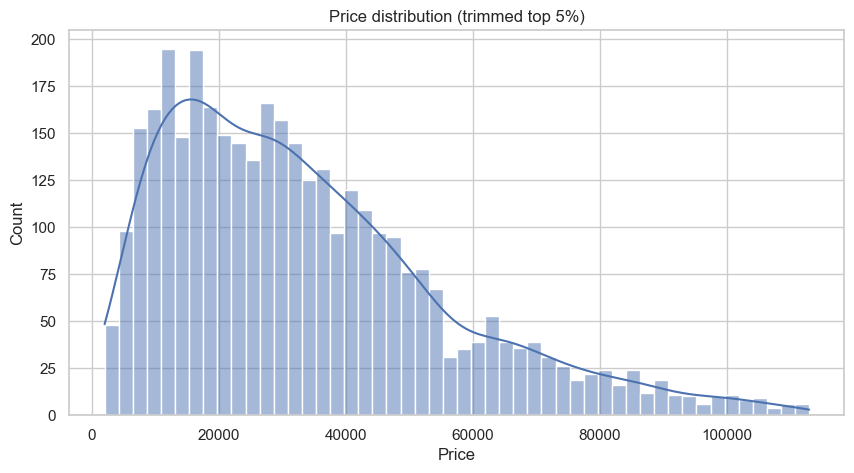

In [10]:
# Remove top 5% price outliers for visualization
q95 = df_clean['price'].quantile(0.95)
df_no_outlier = df_clean[df_clean['price'] <= q95].copy()
print('Price 95th percentile:', q95)
print('Shape before:', df_clean.shape, 'after trimming top 5%:', df_no_outlier.shape)

# Show hist after trimming
plt.figure()
sns.histplot(df_no_outlier['price'], bins=50, kde=True)
plt.title('Price distribution (trimmed top 5%)')
plt.xlabel('Price')
plt.show()

## Univariate analysis for important numeric features
Plotting distributions for `mileage`, `car_age`, `engine_size_L`, and `miles_per_year` (if present).

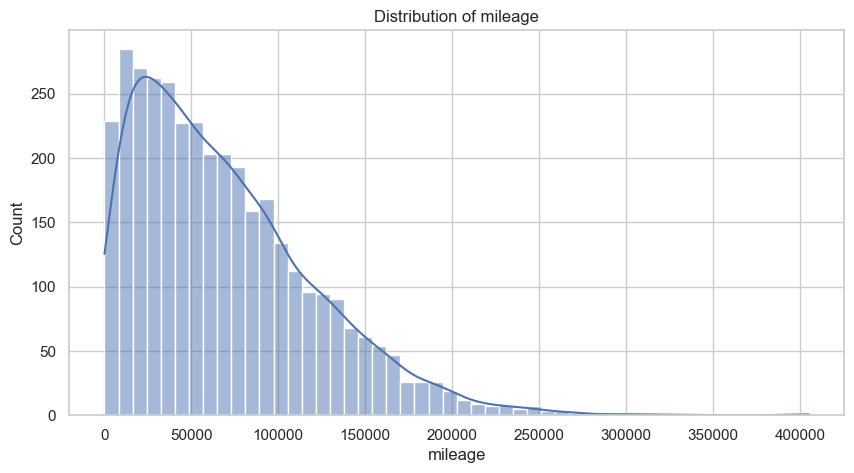

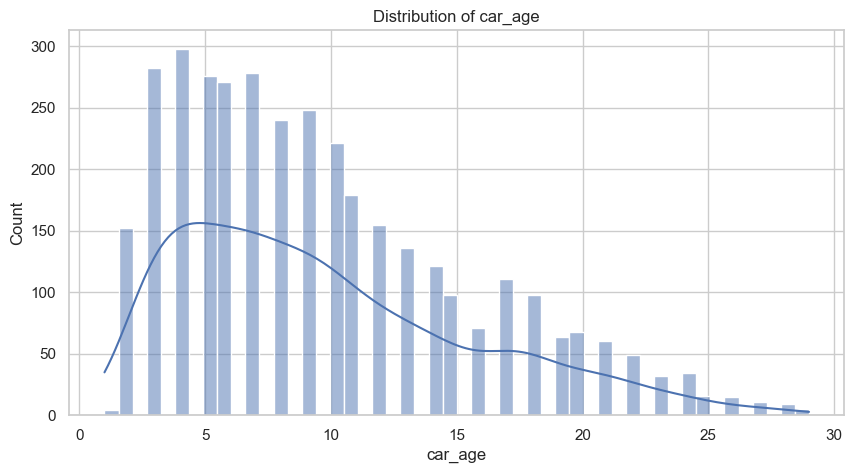

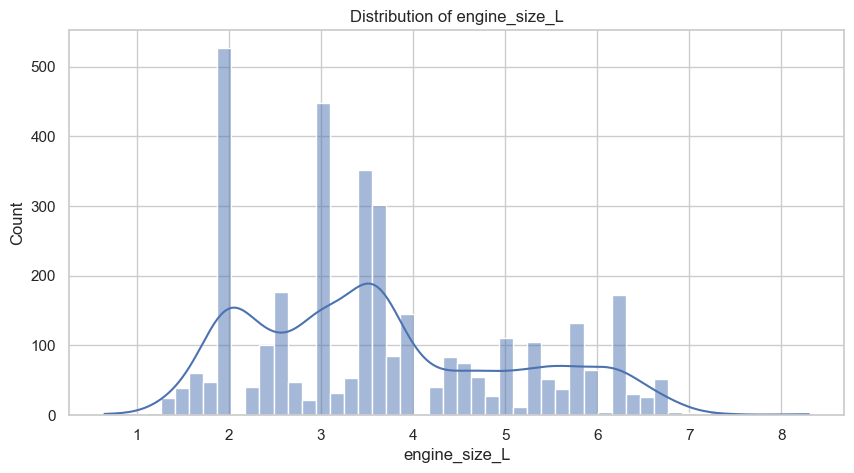

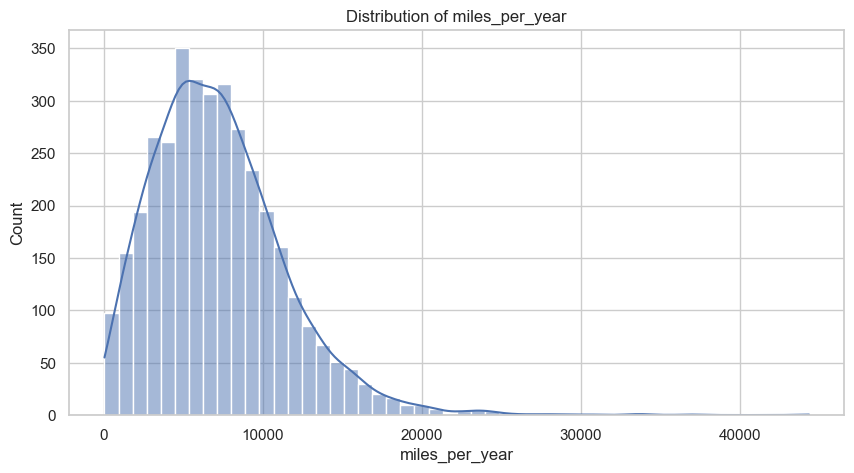

In [11]:
plot_cols = []
for c in ['mileage','car_age','engine_size_L','miles_per_year']:
    if c in df_no_outlier.columns:
        plot_cols.append(c)

for c in plot_cols:
    plt.figure()
    sns.histplot(df_no_outlier[c], bins=50, kde=True)
    plt.title(f'Distribution of {c}')
    plt.xlabel(c)
    plt.show()

## Categorical features
Show counts for common categorical features (brand, fuel_type, transmission, accident, clean_title, colors if present).

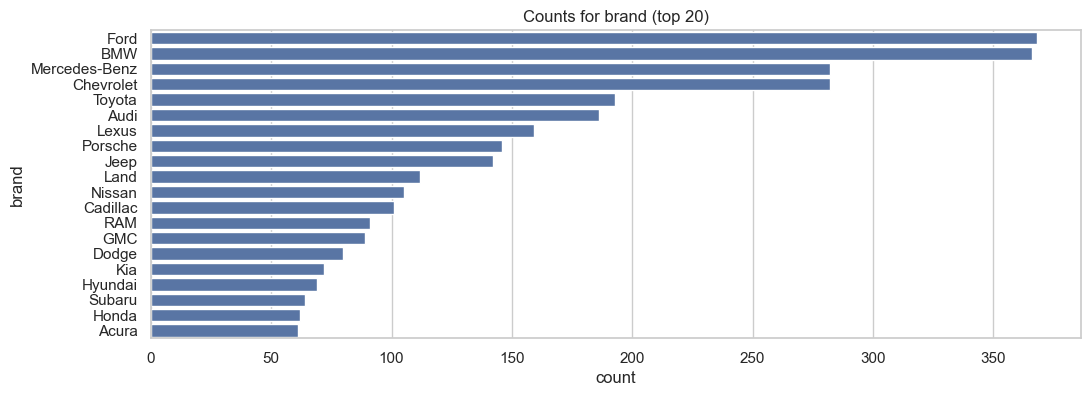

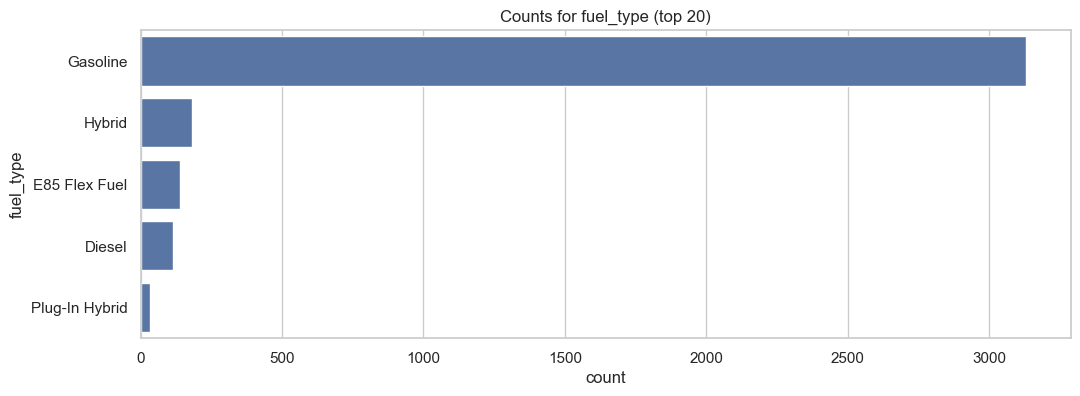

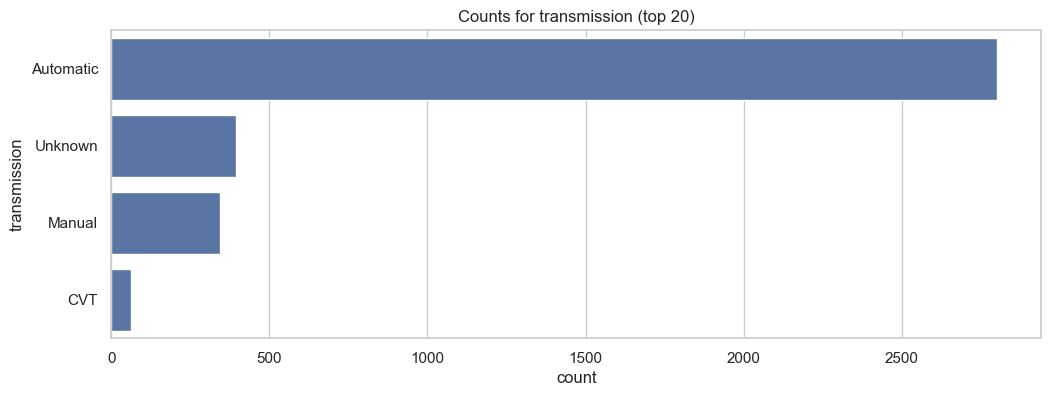

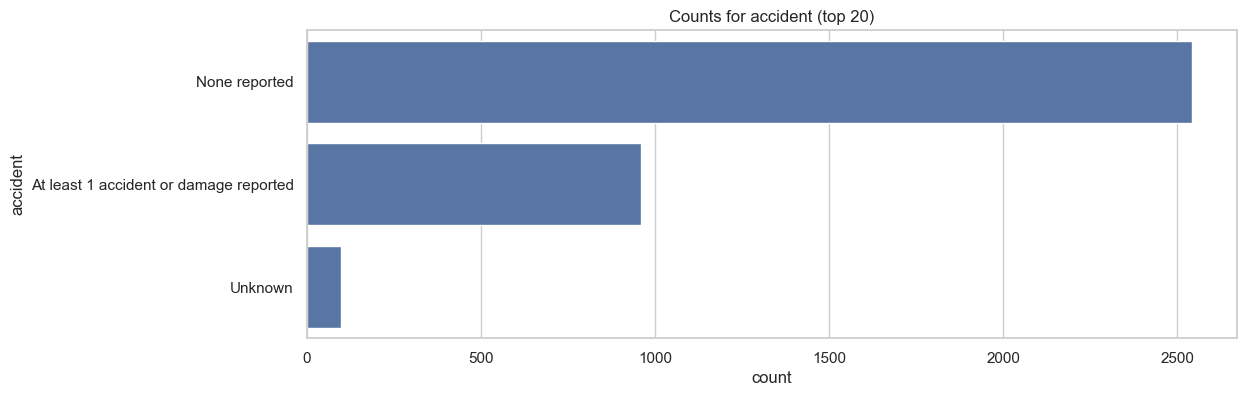

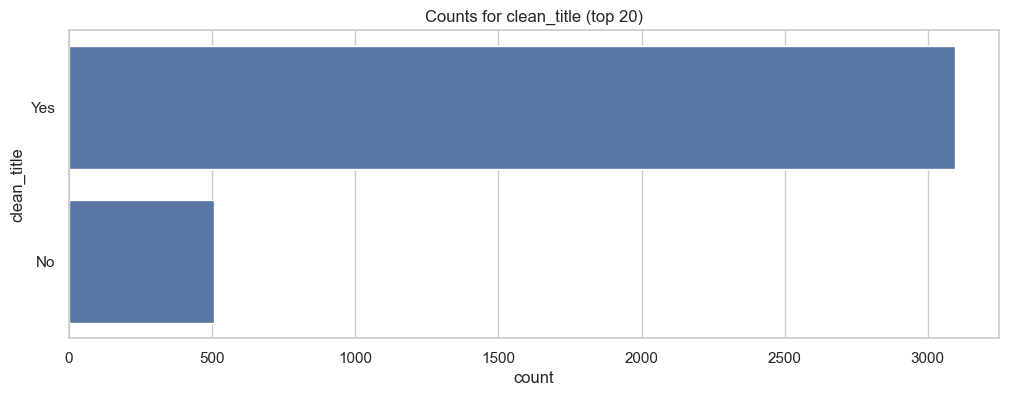

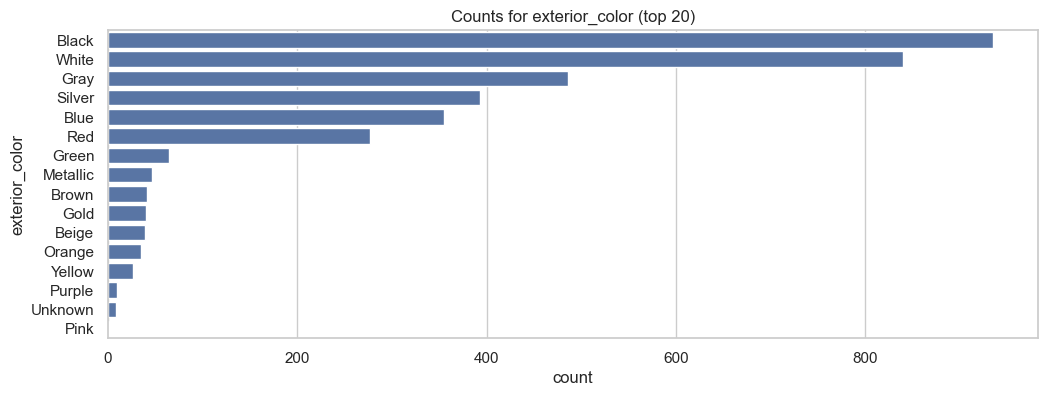

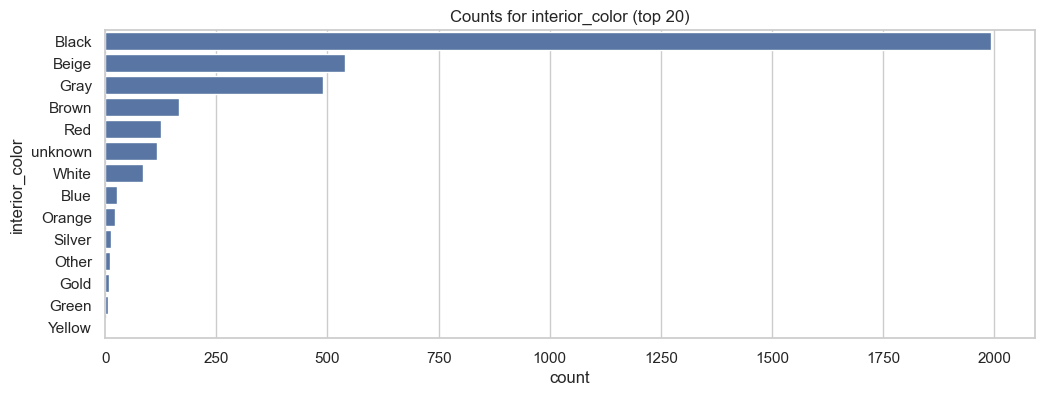

In [12]:
cat_cols = [c for c in ['brand','fuel_type','transmission','accident','clean_title','exterior_color','interior_color'] if c in df_no_outlier.columns]
for c in cat_cols:
    plt.figure(figsize=(12,4))
    sns.countplot(y=c, data=df_no_outlier, order=df_no_outlier[c].value_counts().index[:20])
    plt.title(f'Counts for {c} (top 20)')
    plt.show()

## Bivariate: Price vs numeric features
Scatter plots and correlation coefficients for numeric features vs `price`. Use hexbin for dense scatter where appropriate.

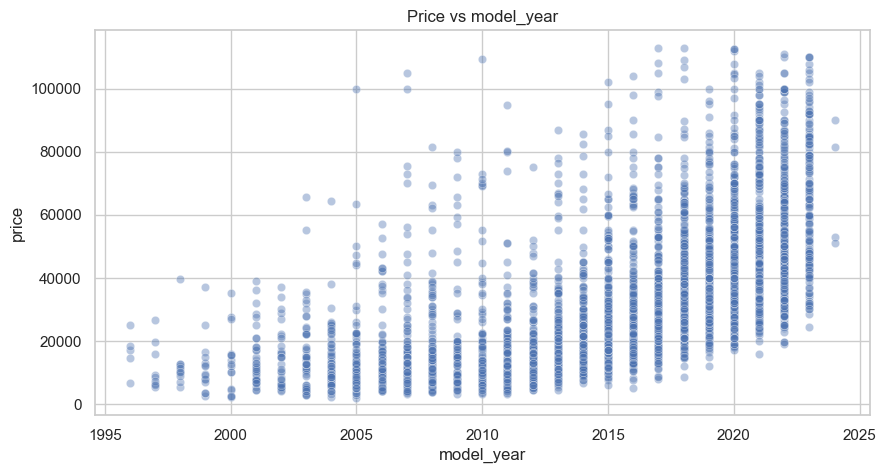

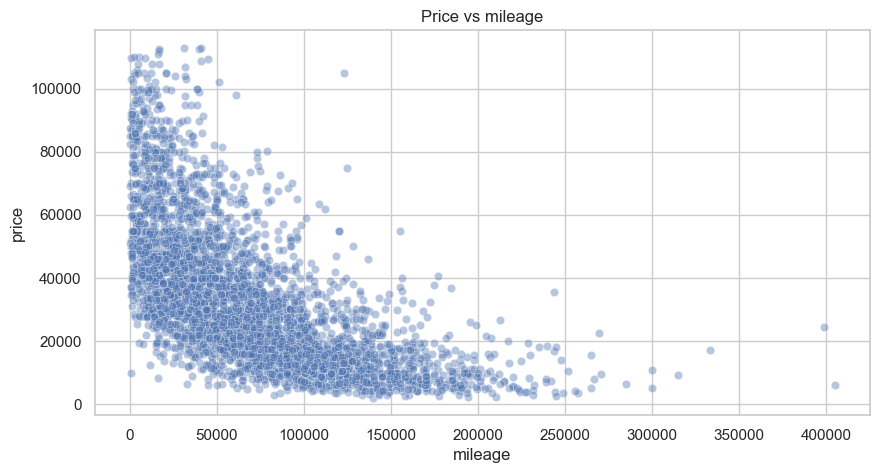

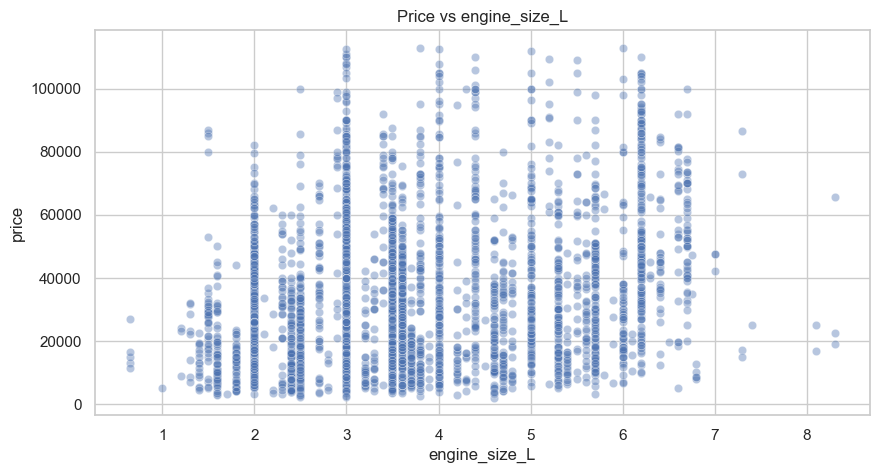

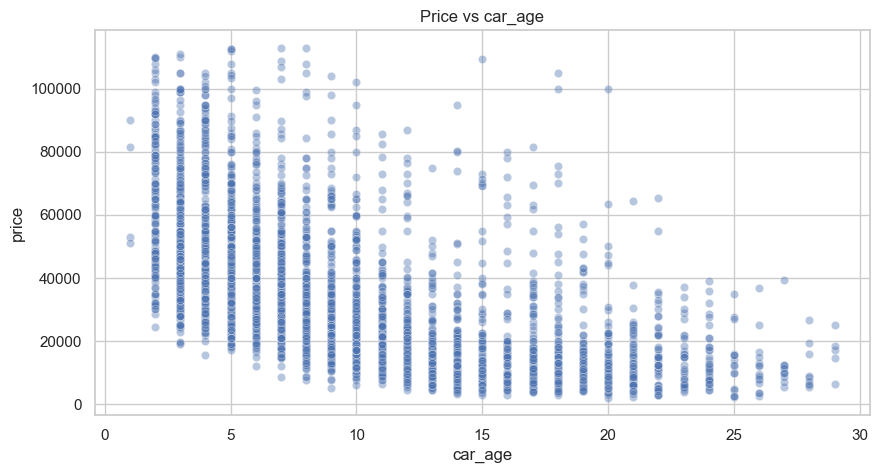

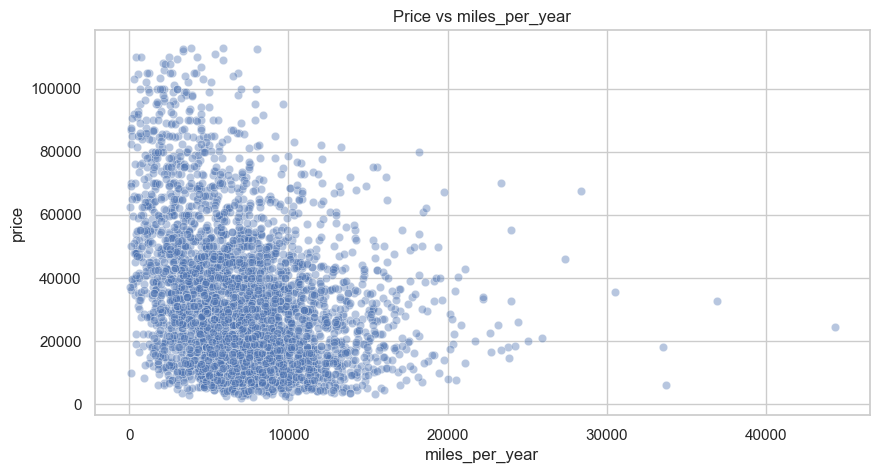

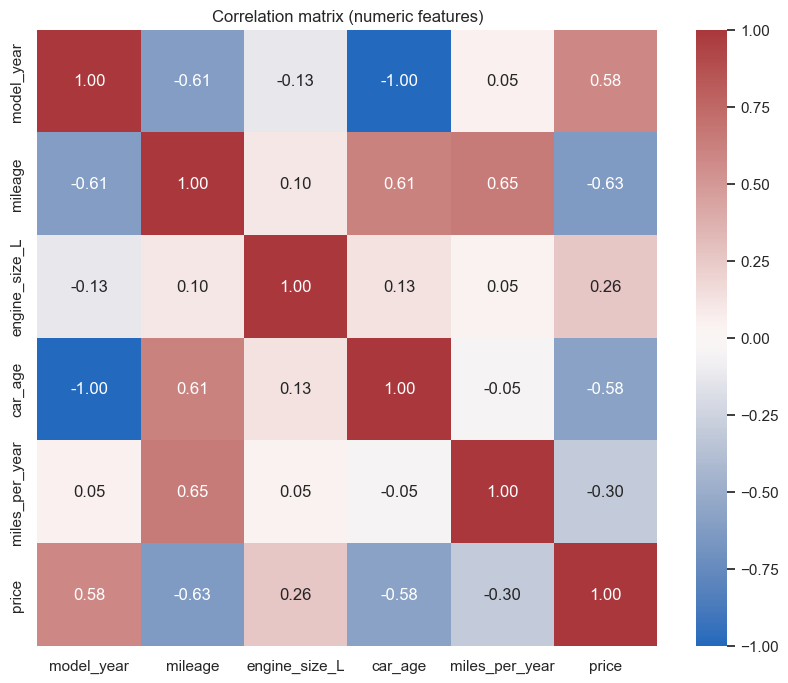


Top correlations with price:
price             1.000000
mileage           0.625935
car_age           0.582149
model_year        0.582149
miles_per_year    0.302774
engine_size_L     0.260276
Name: price, dtype: float64


In [13]:
num_cols = df_no_outlier.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c!='price']

for c in num_cols:
    plt.figure()
    try:
        sns.scatterplot(x=c, y='price', data=df_no_outlier, alpha=0.4)
    except Exception:
        plt.hexbin(df_no_outlier[c], df_no_outlier['price'], gridsize=40)
    plt.title(f'Price vs {c}')
    plt.xlabel(c)
    plt.ylabel('price')
    plt.show()

# Correlation matrix for numeric features
corr = df_no_outlier[[*num_cols,'price']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()

print('\nTop correlations with price:')
print(corr['price'].abs().sort_values(ascending=False).head(10))

## Categorical vs Price
Boxplots to compare price across categories for features like `transmission`, `fuel_type`, and `accident`. Consider ordering and trimming for readability.

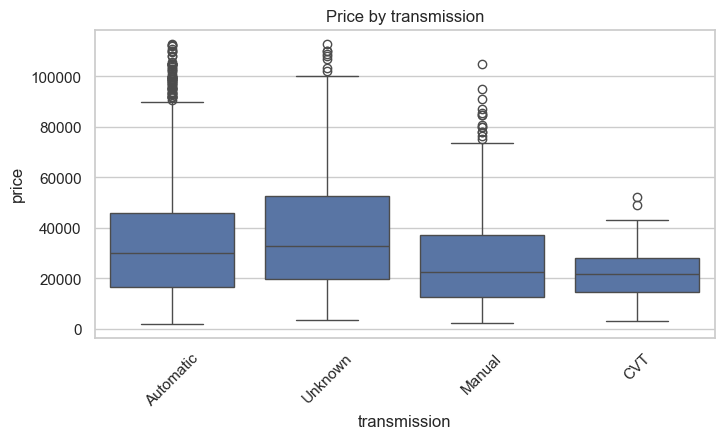

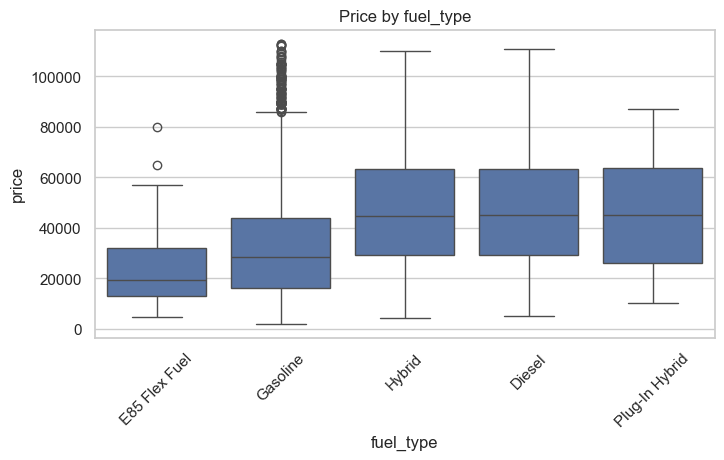

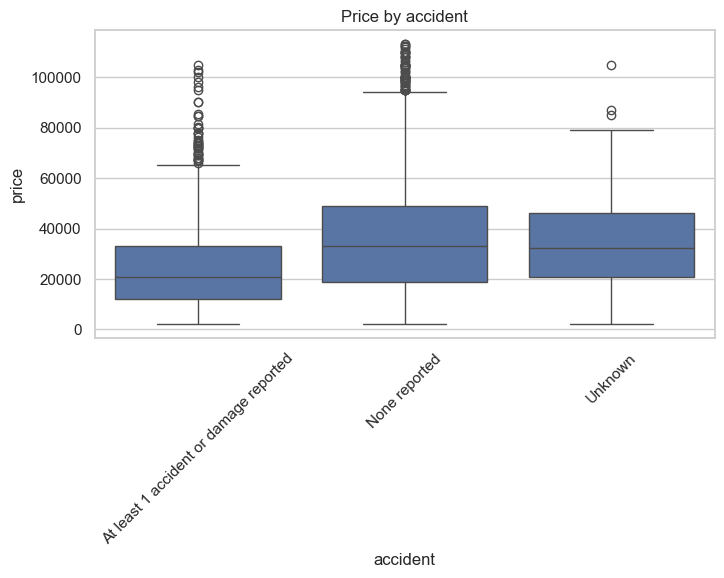

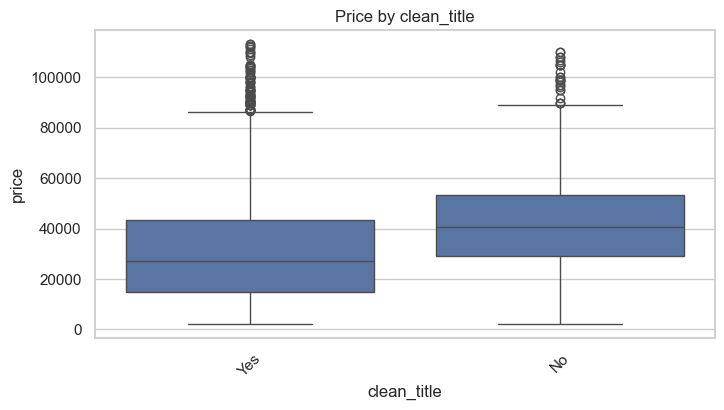

In [14]:
cat_viz = [c for c in ['transmission','fuel_type','accident','clean_title'] if c in df_no_outlier.columns]
for c in cat_viz:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=c, y='price', data=df_no_outlier)
    plt.title(f'Price by {c}')
    plt.xticks(rotation=45)
    plt.show()